In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
plt.rcParams.update({'font.size': 15})

[9.998960116948935e-05]
[9.998960116948935e-05, 0.07251937403931658]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918, 0.39976263971638765]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918, 0.39976263971638765, 0.5405284172031771]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918, 0.39976263971638765, 0.5405284172031771, -8.279239929961378]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918, 0.39976263971638765, 0.5405284172031771, -8.279239929961378, -9.435401891063803]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918, 0.39976263971638765, 0.5405284172031771, -8.279239929961378, -9.435401891063803, -10.634909211365397]
[9.998960116948935e-05, 0.07251937403931658, 0.2309856346435918, 0.39976263971638765, 0.5405284172031771, -8.279239929961378, -9.435401891063803, -10.634909211365397, -11.865043178324193]
[9.998960116948935e-05, 0.07251937403931658, 0.

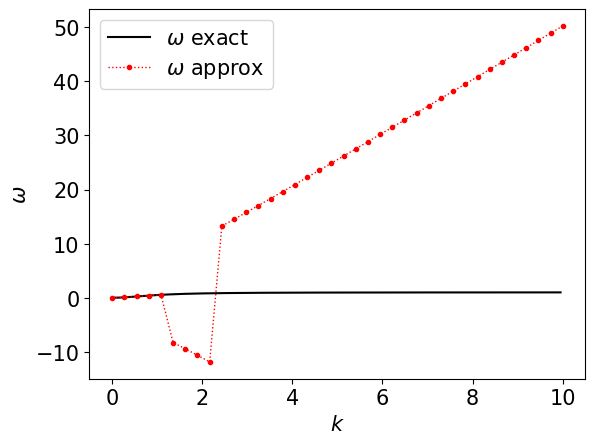

In [120]:
ws = []
def f(k, w): 
    c, wp, wc = 5, 5, 1
    return (c**2 * k ** 2 - w**2 + wp**2 / (1 - wc/w))

ks = np.linspace(0.01, 10, 38)

for k in ks:
    sol = optimize.root_scalar(lambda w : f(k, w), x0 = -1, x1 = -2, method='Secant') 
    if sol.iterations > 15:
        break
    ws.append(sol.root)
    #map(float, ws)
    print(ws)


    
w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))

plt.figure()
plt.plot(k_exact, w_exact, "-k", label = "$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth = 1, label = "$\\omega$ approx")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()


In [90]:
sol = optimize.root_scalar(lambda w : f(k, w), x0 = -1, x1 = -2, method='Secant') 

In [93]:
sol.iterations

11

### def dispersion_relation(k, w):
    c, wp, wc = 5, 5, 1
    return c**2 * k ** 2 - w**2 + wp**2 / (1 - wc/w)

#a 함수를 정의한다. (k가 주어진 a 에서 관계를 푸는 함수를 정의하자.)
def single_step(k, winit):
    max_w = max(winit, key = abs)
    return secant_while(lambda w: dispersion_relation(k, w), winit,
                       lambda i, xy, dw: abs(dw) > abs(1e-7* max_w))

ks = np.linspace(0.01, 10, 40)

ws = [ks[0], ks[1]]

for k in ks:
    ws.append(single_step(k, ws[-2:]))
    
ws = ws[2:]

w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))

plt.figure()
plt.plot(k_exact, w_exact, "-k", label= "$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth = 1, label = "$\\omega$ approx")
plt.xlabel("$k")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()

bisect와 branq 등의 방법은 f(a) 와 f(b)가 부호가 달라야 한다. 즉, 진동하는 함수 값에서 해를 구할 때만 사용 가능하다

>루트를 괄호로 묶는 간격. f(x, *args)는 두 끝점에 다른 기호가 있어야 합니다.


In [118]:
def f(k): 
    c, wp, wc = 5, 5, 1
    f  = w*2 #c**2 * k**2 - w**2 + wp**2/(1 - wc/w)
    return f

def df(k) :
    c, wp, wc = 5, 5, 1
    df = -2*w - wp**2 * wc/(w - wc)**2
    return df


ks = np.linspace(0.1, 10, 40)
ws = [ks[0]]

for k in ks:
    sol = optimize.root_scalar(lambda w, k: f(w, k), fprime = lambda w, k: df(w, k), x0 = 1, 
                        method = 'newton')
    ws.append(sol.root)
    
'''
ws = [ws.append(sol.root) for k in np.linspace(0.01, 10, 40)]
'''


ws = ws[1:]

w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))

plt.figure()
plt.plot(k_exact, w_exact, "-k", label = "$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth = 1, label = "$\\omega$ approx")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()

TypeError: <lambda>() missing 1 required positional argument: 'k'

In [236]:
ks

array([ 0.1       ,  0.35384615,  0.60769231,  0.86153846,  1.11538462,
        1.36923077,  1.62307692,  1.87692308,  2.13076923,  2.38461538,
        2.63846154,  2.89230769,  3.14615385,  3.4       ,  3.65384615,
        3.90769231,  4.16153846,  4.41538462,  4.66923077,  4.92307692,
        5.17692308,  5.43076923,  5.68461538,  5.93846154,  6.19230769,
        6.44615385,  6.7       ,  6.95384615,  7.20769231,  7.46153846,
        7.71538462,  7.96923077,  8.22307692,  8.47692308,  8.73076923,
        8.98461538,  9.23846154,  9.49230769,  9.74615385, 10.        ])

In [1]:
ks = np.linspace(0.1, 10, 40)
ws = [ks[0]]

def f(k): 
    c, wp, wc = 5, 5, 1
    f  = w*2 #c**2 * k**2 - w**2 + wp**2/(1 - wc/w)
    return f


def df(k) :
    c, wp, wc = 5, 5, 1
    df = -2*w - wp**2 * wc/(w - wc)**2
    return df

for k in ks:
    sol = optimize.root_scalar(f, fprime = df, x0 = 1, 
                        method = 'newton')
    print(sol)

NameError: name 'np' is not defined